# Exploring Regularization in DNNs on CIFAR-10

In [1]:
# 📦 Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

### Load and Preprocess CIFAR-10

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))  # (50000, 3072)
x_test = x_test.reshape((x_test.shape[0], -1))

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


### Define Helper Function for Plotting

In [3]:
def plot_history(history, title=""):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

### Baseline Model (No Regularization)

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
313/313 - 16s - 50ms/step - accuracy: 0.3029 - loss: 1.9620 - val_accuracy: 0.3654 - val_loss: 1.7839
Epoch 2/50
313/313 - 20s - 64ms/step - accuracy: 0.3876 - loss: 1.7100 - val_accuracy: 0.3846 - val_loss: 1.7179
Epoch 3/50
313/313 - 21s - 68ms/step - accuracy: 0.4153 - loss: 1.6362 - val_accuracy: 0.4241 - val_loss: 1.6262
Epoch 4/50
313/313 - 12s - 39ms/step - accuracy: 0.4363 - loss: 1.5806 - val_accuracy: 0.4429 - val_loss: 1.5814
Epoch 5/50
313/313 - 22s - 69ms/step - accuracy: 0.4589 - loss: 1.5264 - val_accuracy: 0.4420 - val_loss: 1.5653
Epoch 6/50
313/313 - 20s - 63ms/step - accuracy: 0.4745 - loss: 1.4778 - val_accuracy: 0.4578 - val_loss: 1.5247
Epoch 7/50
313/313 - 13s - 42ms/step - accuracy: 0.4831 - loss: 1.4525 - val_accuracy: 0.4626 - val_loss: 1.5244
Epoch 8/50
313/313 - 12s - 39ms/step - accuracy: 0.4940 - loss: 1.4274 - val_accuracy: 0.4620 - val_loss: 1.5265
Epoch 9/50
313/313 - 12s - 39ms/step - accuracy: 0.5055 - loss: 1.3949 - val_accuracy: 0.4760 - 

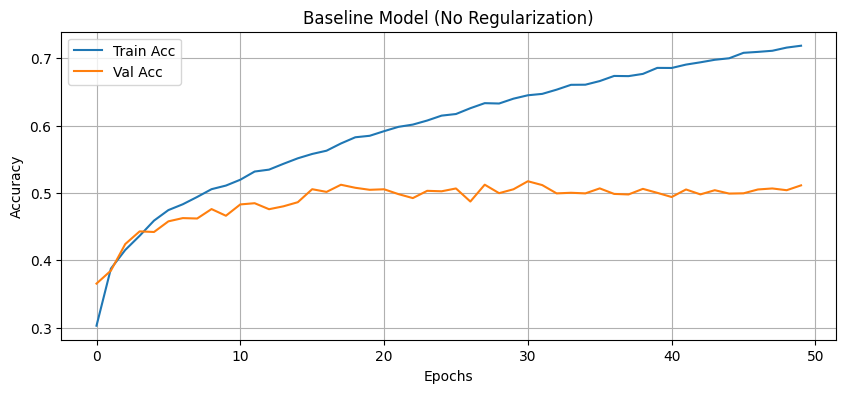

In [4]:
# Baseline model: Dense layers only
def build_baseline_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(3072,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

baseline_model = build_baseline_model()
history_baseline = baseline_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(history_baseline, "Baseline Model (No Regularization)")

#### Interpretation
This is a classic sign of overfitting:
- The training accuracy (71.85%) is much higher than your validation accuracy (51.12%).
- The training loss (0.78) is much lower than your validation loss (1.71).
> The model is learning to memorize the training set but is not generalizing to unseen data.

### Add Dropout

Epoch 1/50
313/313 - 17s - 53ms/step - accuracy: 0.1850 - loss: 2.1734 - val_accuracy: 0.2803 - val_loss: 2.0233
Epoch 2/50
313/313 - 14s - 44ms/step - accuracy: 0.2221 - loss: 2.0472 - val_accuracy: 0.2652 - val_loss: 1.9771
Epoch 3/50
313/313 - 14s - 44ms/step - accuracy: 0.2359 - loss: 2.0105 - val_accuracy: 0.3028 - val_loss: 1.9438
Epoch 4/50
313/313 - 12s - 40ms/step - accuracy: 0.2498 - loss: 1.9877 - val_accuracy: 0.2948 - val_loss: 1.9716
Epoch 5/50
313/313 - 12s - 40ms/step - accuracy: 0.2587 - loss: 1.9625 - val_accuracy: 0.3103 - val_loss: 1.9475
Epoch 6/50
313/313 - 21s - 67ms/step - accuracy: 0.2599 - loss: 1.9582 - val_accuracy: 0.2859 - val_loss: 1.9525
Epoch 7/50
313/313 - 21s - 68ms/step - accuracy: 0.2698 - loss: 1.9410 - val_accuracy: 0.3045 - val_loss: 1.9255
Epoch 8/50
313/313 - 14s - 45ms/step - accuracy: 0.2722 - loss: 1.9365 - val_accuracy: 0.3203 - val_loss: 1.9186
Epoch 9/50
313/313 - 20s - 64ms/step - accuracy: 0.2747 - loss: 1.9259 - val_accuracy: 0.2980 - 

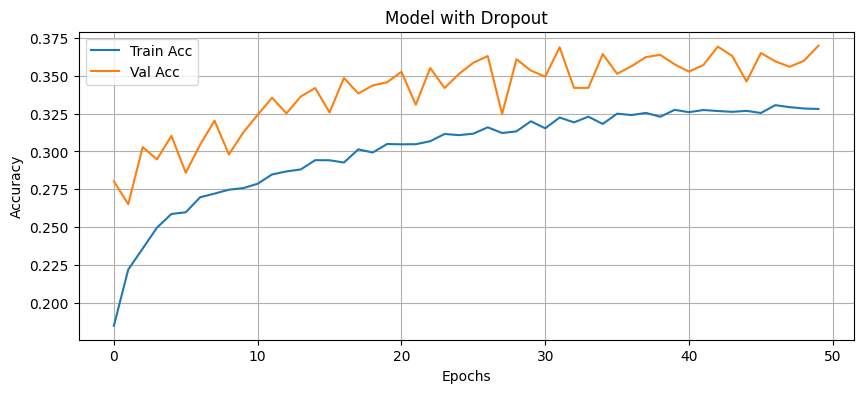

In [5]:
# Model with Dropout
def build_dropout_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(3072,)),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

dropout_model = build_dropout_model()
history_dropout = dropout_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(history_dropout, "Model with Dropout")

#### Observations

Compared to the baseline model, this is actually worse — both train and validation accuracy are lower.
Dropout is supposed to reduce overfitting, not destroy learning.
This usually means:
- Using too much dropout for a small model.
- Two Dropout(0.5) layers in a shallow network often over-regularizes the model.

> This leads to underfitting — where the model fails to learn patterns well, even on training data.

### Apply Early Stopping

Epoch 1/50
313/313 - 13s - 42ms/step - accuracy: 0.2487 - loss: 2.0462 - val_accuracy: 0.3256 - val_loss: 1.8680
Epoch 2/50
313/313 - 10s - 33ms/step - accuracy: 0.3072 - loss: 1.8948 - val_accuracy: 0.3469 - val_loss: 1.8207
Epoch 3/50
313/313 - 21s - 66ms/step - accuracy: 0.3228 - loss: 1.8540 - val_accuracy: 0.3494 - val_loss: 1.7975
Epoch 4/50
313/313 - 10s - 33ms/step - accuracy: 0.3361 - loss: 1.8238 - val_accuracy: 0.3606 - val_loss: 1.7758
Epoch 5/50
313/313 - 10s - 31ms/step - accuracy: 0.3477 - loss: 1.7903 - val_accuracy: 0.3947 - val_loss: 1.7214
Epoch 6/50
313/313 - 10s - 31ms/step - accuracy: 0.3595 - loss: 1.7667 - val_accuracy: 0.4031 - val_loss: 1.7072
Epoch 7/50
313/313 - 10s - 33ms/step - accuracy: 0.3626 - loss: 1.7564 - val_accuracy: 0.3914 - val_loss: 1.7054
Epoch 8/50
313/313 - 11s - 34ms/step - accuracy: 0.3663 - loss: 1.7438 - val_accuracy: 0.4048 - val_loss: 1.6933
Epoch 9/50
313/313 - 10s - 32ms/step - accuracy: 0.3657 - loss: 1.7415 - val_accuracy: 0.4005 - 

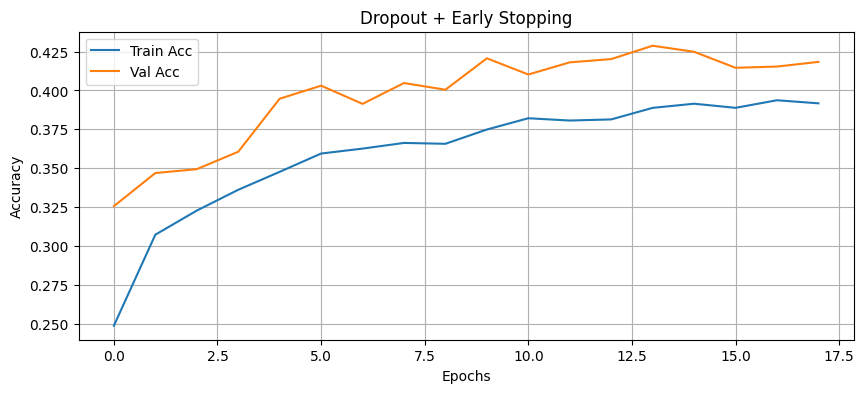

Best Epoch: 13


In [8]:
# Reuse dropout model but with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

dropout_es_model = build_dropout_model()
history_dropout_es = dropout_es_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

plot_history(history_dropout_es, "Dropout + Early Stopping")
print(f"Best Epoch: {np.argmin(history_dropout_es.history['val_loss']) + 1}")

### Add L2 Weight Regularization

Epoch 1/50
313/313 - 14s - 44ms/step - accuracy: 0.3108 - loss: 2.4511 - val_accuracy: 0.3526 - val_loss: 2.0814
Epoch 2/50
313/313 - 12s - 39ms/step - accuracy: 0.3828 - loss: 1.9379 - val_accuracy: 0.3798 - val_loss: 1.9017
Epoch 3/50
313/313 - 12s - 37ms/step - accuracy: 0.4036 - loss: 1.8155 - val_accuracy: 0.4009 - val_loss: 1.8054
Epoch 4/50
313/313 - 11s - 36ms/step - accuracy: 0.4252 - loss: 1.7352 - val_accuracy: 0.4249 - val_loss: 1.7363
Epoch 5/50
313/313 - 11s - 36ms/step - accuracy: 0.4403 - loss: 1.6879 - val_accuracy: 0.4408 - val_loss: 1.7105
Epoch 6/50
313/313 - 12s - 38ms/step - accuracy: 0.4503 - loss: 1.6535 - val_accuracy: 0.4409 - val_loss: 1.6732
Epoch 7/50
313/313 - 11s - 34ms/step - accuracy: 0.4595 - loss: 1.6241 - val_accuracy: 0.4388 - val_loss: 1.6765
Epoch 8/50
313/313 - 12s - 37ms/step - accuracy: 0.4667 - loss: 1.6093 - val_accuracy: 0.4674 - val_loss: 1.6305
Epoch 9/50
313/313 - 13s - 40ms/step - accuracy: 0.4714 - loss: 1.5854 - val_accuracy: 0.4288 - 

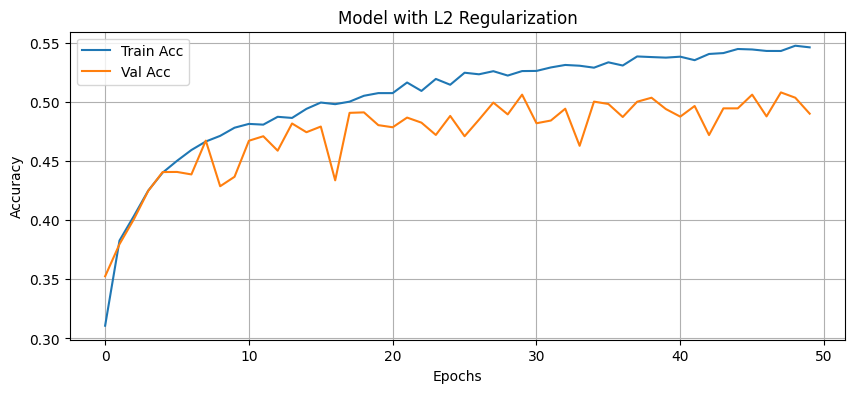

In [9]:
# Model with L2 regularization
def build_l2_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(3072,)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

l2_model = build_l2_model()
history_l2 = l2_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(history_l2, "Model with L2 Regularization")

#### Interpretation
- Train and validation accuracy are closer than in the baseline → overfitting has been reduced.
- You got the best validation accuracy so far (49%), and training accuracy is solid.
- But validation accuracy still plateaus under 50%, meaning model capacity is still limited.

### Compare Model Depth

Epoch 1/50
313/313 - 21s - 69ms/step - accuracy: 0.2915 - loss: 1.9525 - val_accuracy: 0.3296 - val_loss: 1.8428
Epoch 2/50
313/313 - 21s - 67ms/step - accuracy: 0.3798 - loss: 1.7202 - val_accuracy: 0.3758 - val_loss: 1.7386
Epoch 3/50
313/313 - 21s - 66ms/step - accuracy: 0.4058 - loss: 1.6497 - val_accuracy: 0.4162 - val_loss: 1.6380
Epoch 4/50
313/313 - 20s - 65ms/step - accuracy: 0.4350 - loss: 1.5746 - val_accuracy: 0.4302 - val_loss: 1.5915
Epoch 5/50
313/313 - 25s - 80ms/step - accuracy: 0.4537 - loss: 1.5254 - val_accuracy: 0.4451 - val_loss: 1.5670
Epoch 6/50
313/313 - 25s - 79ms/step - accuracy: 0.4667 - loss: 1.4840 - val_accuracy: 0.4579 - val_loss: 1.5210
Epoch 7/50
313/313 - 25s - 80ms/step - accuracy: 0.4791 - loss: 1.4431 - val_accuracy: 0.4609 - val_loss: 1.5224
Epoch 8/50
313/313 - 25s - 80ms/step - accuracy: 0.4947 - loss: 1.4099 - val_accuracy: 0.4743 - val_loss: 1.4765
Epoch 9/50
313/313 - 25s - 79ms/step - accuracy: 0.5053 - loss: 1.3796 - val_accuracy: 0.4837 - 

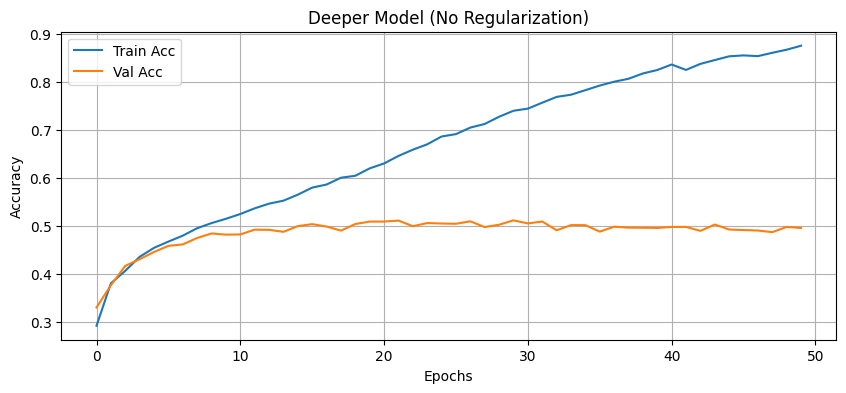

In [13]:
# Deeper model
def build_deep_model():
    model = models.Sequential([
        layers.Dense(1024, activation='relu', input_shape=(3072,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

deep_model = build_deep_model()
history_deep = deep_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(history_deep, "Deeper Model (No Regularization)")

The deep model:
- Has massive overfitting — train acc nearly 88%, val acc just ~49%
- Low loss on training, huge loss on validation → your model is confidently wrong on test data

### Compare Results

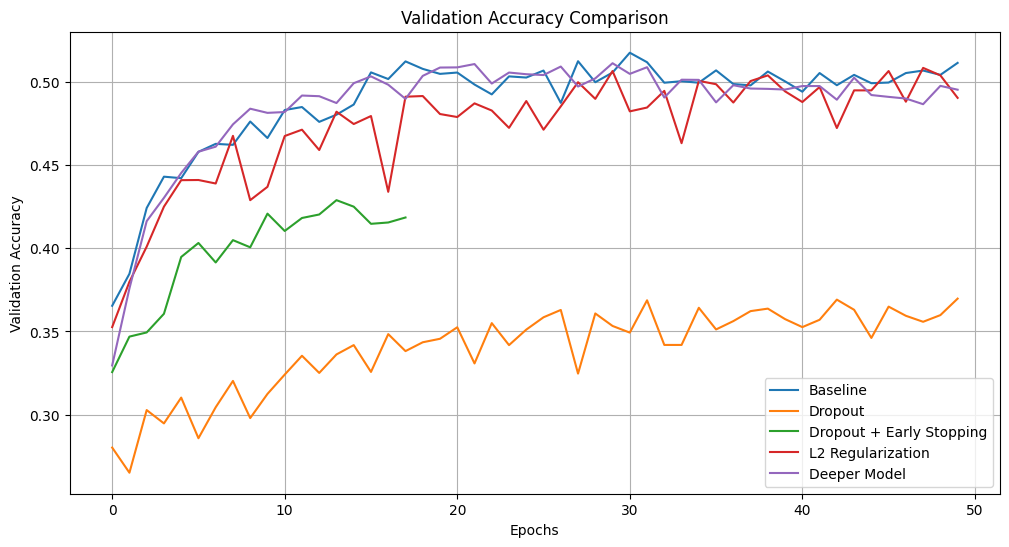

In [14]:
# Final comparison of validation accuracy
models_histories = {
    "Baseline": history_baseline,
    "Dropout": history_dropout,
    "Dropout + Early Stopping": history_dropout_es,
    "L2 Regularization": history_l2,
    "Deeper Model": history_deep
}

plt.figure(figsize=(12, 6))
for name, history in models_histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Experiment Summary: Regularization and Model Depth on CIFAR-10

#### Objective
Explore how regularization techniques (Dropout, Early Stopping, L2 Regularization) and model depth affect **overfitting** and **generalization** on a fully connected (Dense) neural network trained on the CIFAR-10 dataset.

---

#### Results Summary

| Model                              | Train Accuracy | Val Accuracy | Overfitting | Notes                               |
|-----------------------------------|----------------|--------------|-------------|-------------------------------------|
| **Baseline (No Regularization)**  | 71.85%         | 51.12%       | ⚠️ High      | Learns training well, overfits badly |
| Dropout Only (rate = 0.5)         | 32.80%         | 36.97%       | ✅ Low       | Underfits due to high dropout       |
| Dropout + EarlyStopping           | 39.18%         | 41.84%       | ✅ Low       | Slight improvement, still underfits |
| **L2 Regularization (λ = 0.001)** | 54.63%         | 49.02%       | ✅ Balanced  | ⭐ Best trade-off, reduced overfitting |
| L2 + Dropout + EarlyStopping      | 35.28%         | 38.11%       | ✅ Low       | Too much regularization — underfits |
| **Deep Model (No Regularization)**| 87.48%         | 49.51%       | ❌ High      | Severely overfits, poor generalization |

---

#### Key Observations

- **Dropout** helps reduce overfitting but can easily cause underfitting if used too aggressively (e.g., 0.5 dropout rate).
- **Early Stopping** prevents unnecessary training once validation loss plateaus, saving time and avoiding deeper overfitting.
- **L2 Regularization** significantly improves generalization without harming training accuracy too much — **best results** overall.
- **Combining Dropout + L2 + EarlyStopping** in a shallow network can be too aggressive, leading to underfitting.
- **Increasing Model Depth** drastically improves training accuracy, but without regularization, it leads to **severe overfitting** — validation accuracy stagnates, and validation loss increases sharply.

---

#### Conclusion

- Regularization techniques are essential to improve generalization on complex datasets like CIFAR-10.
- For fully connected networks:
  - **L2 Regularization alone** provides the best performance.
  - **Deep models without regularization** are prone to overfitting.
- For even better performance on CIFAR-10, consider switching to **Convolutional Neural Networks (CNNs)**.

---


### Improved Deep Dense Model for CIFAR-10 (with regularization)

In [15]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

def build_improved_dense_model():
    model = models.Sequential([
        layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(3072,)),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# EarlyStopping to prevent over-training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Build and train the improved model
improved_model = build_improved_dense_model()
history_improved = improved_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/50
313/313 - 36s - 115ms/step - accuracy: 0.2368 - loss: 3.1307 - val_accuracy: 0.3162 - val_loss: 2.3477
Epoch 2/50
313/313 - 40s - 128ms/step - accuracy: 0.3147 - loss: 2.2168 - val_accuracy: 0.3596 - val_loss: 2.0067
Epoch 3/50
313/313 - 42s - 135ms/step - accuracy: 0.3257 - loss: 2.0410 - val_accuracy: 0.3536 - val_loss: 1.9515
Epoch 4/50
313/313 - 41s - 129ms/step - accuracy: 0.3266 - loss: 1.9781 - val_accuracy: 0.3461 - val_loss: 1.8990
Epoch 5/50
313/313 - 31s - 98ms/step - accuracy: 0.3364 - loss: 1.9254 - val_accuracy: 0.3452 - val_loss: 1.9071
Epoch 6/50
313/313 - 40s - 129ms/step - accuracy: 0.3402 - loss: 1.9060 - val_accuracy: 0.3562 - val_loss: 1.8621
Epoch 7/50
313/313 - 41s - 131ms/step - accuracy: 0.3431 - loss: 1.8867 - val_accuracy: 0.3768 - val_loss: 1.8355
Epoch 8/50
313/313 - 30s - 96ms/step - accuracy: 0.3482 - loss: 1.8776 - val_accuracy: 0.3583 - val_loss: 1.8432
Epoch 9/50
313/313 - 30s - 97ms/step - accuracy: 0.3526 - loss: 1.8632 - val_accuracy: 0.3

### Plot Results (Training vs Validation)

In [ ]:
def plot_history(history, title):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history_improved, "Improved Deep Dense Model with Regularization")